In [25]:
import pandas as pd


file_path = r'C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\2024_10_25_17val44min_III_P_K_A_params.dat'
df = pd.read_csv(file_path, delimiter=';') 

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SC      39 non-null     object
 1    F/B    39 non-null     object
 2    Uoc    39 non-null     object
 3    jsc    39 non-null     object
 4    FF     39 non-null     object
 5    Umax   39 non-null     object
 6    jmax   39 non-null     object
 7    Pmax   39 non-null     object
 8    PCE    39 non-null     object
 9    S      39 non-null     object
 10   t      39 non-null     object
dtypes: object(11)
memory usage: 3.5+ KB


In [26]:
df.columns = df.columns.str.strip()


df.columns.tolist()

['SC', 'F/B', 'Uoc', 'jsc', 'FF', 'Umax', 'jmax', 'Pmax', 'PCE', 'S', 't']

In [27]:
for column in ['Uoc', 'jsc', 'FF', 'Umax', 'jmax', 'Pmax', 'PCE', 'S', 't']:
    if column in df.columns and df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column].str.strip(), errors='coerce')


df.dtypes, df.head()

(SC       object
 F/B      object
 Uoc     float64
 jsc     float64
 FF      float64
 Umax    float64
 jmax    float64
 Pmax    float64
 PCE     float64
 S       float64
 t       float64
 dtype: object,
                     SC    F/B    Uoc       jsc       FF   Umax      jmax  \
 0                 [?]    [?]     NaN       NaN      NaN    NaN       NaN   
 1  P_III_REF_1k_10-25     FW   1.048 -14.83888  57.3896  0.736 -12.12625   
 2  P_III_REF_1k_10-25     BW   1.048 -14.98405  59.5824  0.827 -11.31375   
 3  P_III_REF_2k_10-25     FW   0.996 -13.43314  61.5012  0.736 -11.18000   
 4  P_III_REF_2k_10-25     BW   1.035 -13.84410  63.4651  0.775 -11.73375   
 
      Pmax     PCE     S    t  
 0     NaN     NaN   NaN  NaN  
 1 -8.9247  8.9247  0.08 -1.0  
 2 -9.3564  9.3564  0.08 -1.0  
 3 -8.2285  8.2285  0.08 -1.0  
 4 -9.0937  9.0937  0.08 -1.0  )

c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same ef

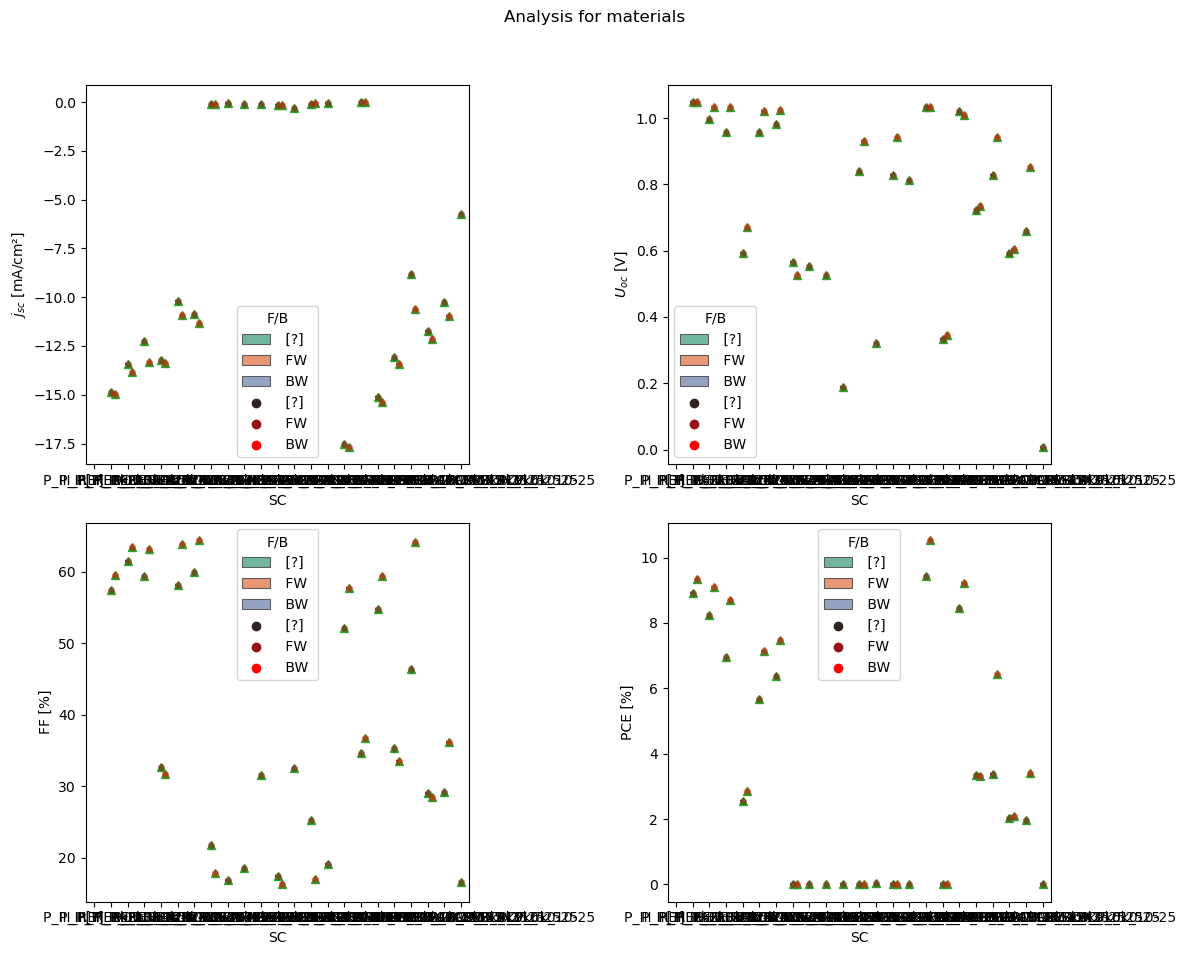

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df['jsc'] = pd.to_numeric(df['jsc'], errors='coerce')
df['Uoc'] = pd.to_numeric(df['Uoc'], errors='coerce')
df['FF'] = pd.to_numeric(df['FF'], errors='coerce')
df['PCE'] = pd.to_numeric(df['PCE'], errors='coerce')



fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Analysis for materials')


plot_params = {'data': df, 'x': 'SC', 'hue': 'F/B', 'dodge': True, 'showmeans': True, 'showfliers': False, 'palette': 'Set2'}


sns.boxplot(y='jsc', ax=axes[0, 0], **plot_params)
sns.stripplot(y='jsc', ax=axes[0, 0], data=df, x='SC', hue='F/B', dodge=True, color='red', alpha=0.5, marker='o')
axes[0, 0].set_ylabel('$j_{sc}$ [mA/cm²]')


sns.boxplot(y='Uoc', ax=axes[0, 1], **plot_params)
sns.stripplot(y='Uoc', ax=axes[0, 1], data=df, x='SC', hue='F/B', dodge=True, color='red', alpha=0.5, marker='o')
axes[0, 1].set_ylabel('$U_{oc}$ [V]')


sns.boxplot(y='FF', ax=axes[1, 0], **plot_params)
sns.stripplot(y='FF', ax=axes[1, 0], data=df, x='SC', hue='F/B', dodge=True, color='red', alpha=0.5, marker='o')
axes[1, 0].set_ylabel('FF [%]')


sns.boxplot(y='PCE', ax=axes[1, 1], **plot_params)
sns.stripplot(y='PCE', ax=axes[1, 1], data=df, x='SC', hue='F/B', dodge=True, color='red', alpha=0.5, marker='o')
axes[1, 1].set_ylabel('PCE [%]')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same ef

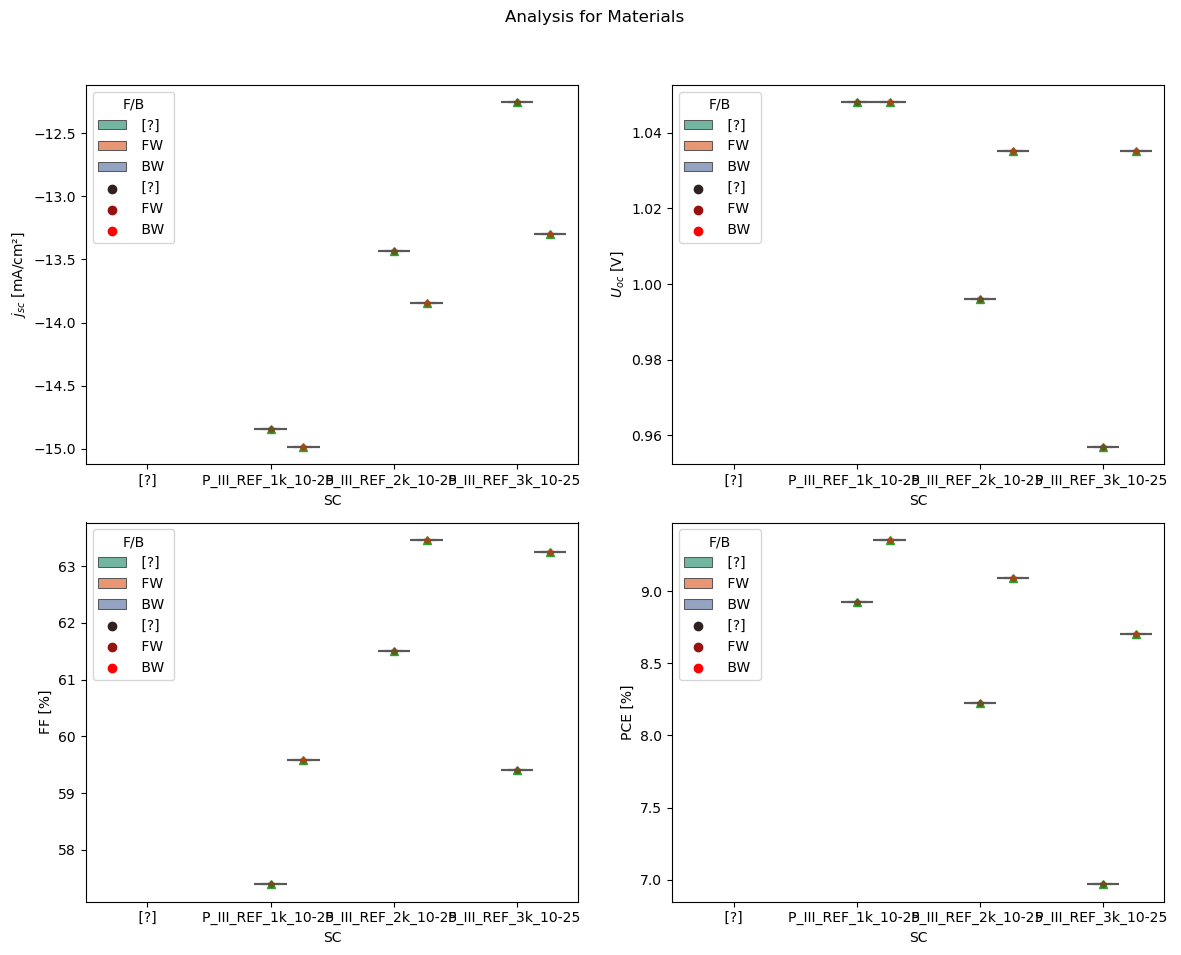

In [29]:
df['jsc'] = pd.to_numeric(df['jsc'], errors='coerce')
df['Uoc'] = pd.to_numeric(df['Uoc'], errors='coerce')
df['FF'] = pd.to_numeric(df['FF'], errors='coerce')
df['PCE'] = pd.to_numeric(df['PCE'], errors='coerce')

selected_materials = df['SC'].unique()[:4]
df_filtered = df[df['SC'].isin(selected_materials)]


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Analysis for Materials')


plot_params['data'] = df_filtered 
plot_params['x'] = 'SC'


sns.boxplot(y='jsc', ax=axes[0, 0], **plot_params)
sns.stripplot(y='jsc', ax=axes[0, 0], data=df_filtered, x='SC', hue='F/B', dodge=True, color='red', alpha=0.5, marker='o')
axes[0, 0].set_ylabel('$j_{sc}$ [mA/cm²]')


sns.boxplot(y='Uoc', ax=axes[0, 1], **plot_params)
sns.stripplot(y='Uoc', ax=axes[0, 1], data=df_filtered, x='SC', hue='F/B', dodge=True, color='red', alpha=0.5, marker='o')
axes[0, 1].set_ylabel('$U_{oc}$ [V]')


sns.boxplot(y='FF', ax=axes[1, 0], **plot_params)
sns.stripplot(y='FF', ax=axes[1, 0], data=df_filtered, x='SC', hue='F/B', dodge=True, color='red', alpha=0.5, marker='o')
axes[1, 0].set_ylabel('FF [%]')


sns.boxplot(y='PCE', ax=axes[1, 1], **plot_params)
sns.stripplot(y='PCE', ax=axes[1, 1], data=df_filtered, x='SC', hue='F/B', dodge=True, color='red', alpha=0.5, marker='o')
axes[1, 1].set_ylabel('PCE [%]')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [30]:
pip install mypy

Note: you may need to restart the kernel to use updated packages.


In [33]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


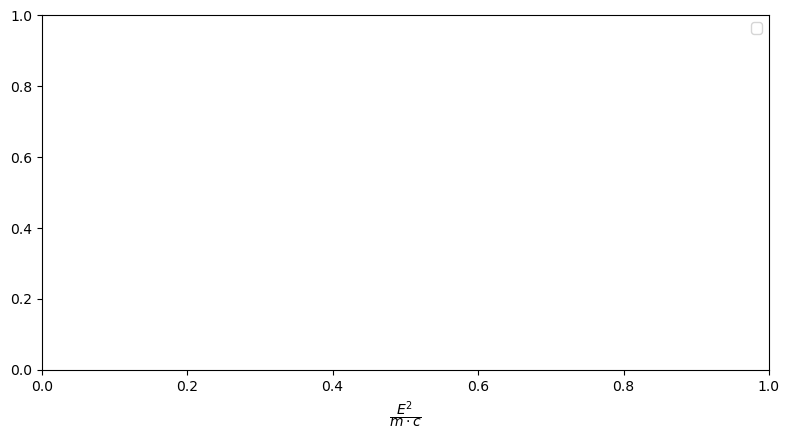

In [34]:
fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
xtitle = r'$\dfrac{E^2}{m \cdot c}$'
axis.set_xlabel(xtitle)
axis.legend(loc='best')
axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()